In [ ]:
import janitor
import palmerpenguins
import statsmodels
import empiricaldist
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns 
import sklearn.metrics
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import scipy.stats
import statsmodels.stats as ss 

In [ ]:
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11,9.4)
penguin_color = {
  "Adelie":"#ff6602ff",
  "Gentoo":"#07f7175f",
  "Chinstrap":"#c65dc9ff"
}

In [ ]:
raw_penguins_df = palmerpenguins.load_penguins_raw()

In [ ]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df.dtypes

In [ ]:
preprocess_penguins_df.dtypes.value_counts()

In [ ]:
preprocess_penguins_df.shape

In [ ]:
preprocess_penguins_df.isnull().any()

In [ ]:
preprocess_penguins_df.isnull().sum()

In [ ]:
(preprocess_penguins_df
.isnull()
.sum()
.sum())

In [ ]:
preprocess_penguins_df.isnull().melt().pipe(lambda df: (sns.displot(data=df, y='variable', hue='value',multiple='fill')))

preprocess_penguins_df.isnull().transpose().pipe(lambda df: (sns.heatmap(data=df)))

In [ ]:
processed_penguins_df = preprocess_penguins_df.dropna()

In [ ]:
processed_penguins_df

In [ ]:
lista1 = []
for columnas in preprocess_penguins_df.columns:
  lista1.append(preprocess_penguins_df[preprocess_penguins_df[columnas].isnull()].index)

lista2 = []
for columna in lista1:
  for numero_fila in columna:
    lista2.append(numero_fila)

lista3 = list(set(lista2))
lista3.sort()
preprocess_penguins_df.iloc[lista3[2]]

In [ ]:
data_island = processed_penguins_df.astype({
  'species':'category',
  'island':'category',
  'sex':'category'
})
fig, axes = plt.subplots(1,3, figsize=(30,10))
columns = data_island.select_dtypes('category').columns
for i in range(len(columns)):
  sns.histplot(
    ax=axes[i],
    data=data_island,
    x=columns[i],
    hue='species',
    multiple='stack',
  )
plt.show()

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,10))

for i in range(len(columns)):
   sns.histplot(
        ax=ax[i],
        data=data_island.add_column('x','').reset_index(),
        x='x',
        hue=columns[i],
        multiple='stack',
        palette=penguin_color if columns[i]=='species' else None,
        alpha=0.5
    )

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
a = data_island['species'].value_counts().reset_index()
a
ax.pie(x=a['count'], labels=a['species'], autopct='%0.1f%%')
plt.show()

In [ ]:
species = preprocess_penguins_df['species'].value_counts().reset_index()

In [ ]:
sns.barplot(data=species, x='species', y='count', hue='species')

In [ ]:
maxs = processed_penguins_df.max(numeric_only=True)

In [ ]:
mins = processed_penguins_df.min(numeric_only=True)

In [ ]:
rango = maxs - mins 

rango

In [ ]:
desv_est = processed_penguins_df.std(numeric_only=True)
desv_est

In [ ]:
mean_penguins = processed_penguins_df.mean(numeric_only=True)

In [ ]:
q1 = processed_penguins_df['flipper_length_mm'].quantile(q=0.25)

q3 = processed_penguins_df['flipper_length_mm'].quantile(q=0.75)

iqr = q3-q1

In [ ]:
cuantiles = processed_penguins_df.quantile(q=[0.75, 0.5, 0.25], numeric_only=True).transpose().rename_axis('variable').reset_index().assign(iqr=lambda df: df[0.75]-df[0.25])

In [ ]:
sns.histplot(data=processed_penguins_df, x='flipper_length_mm', bins=30, hue='species')
plt.axvline(x=processed_penguins_df['flipper_length_mm'].mode()[0], color='red', linestyle='dashed', linewidth=2)

plt.axvline(x=processed_penguins_df['flipper_length_mm'].mean())

plt.axvline(x=processed_penguins_df['flipper_length_mm'].median())
plt.axvline(x=q1)
plt.axvline(x=q3, label='er')

plt.text(184.7,25.5, 'Q(25%)', fontsize=12)
plt.text(192,25.5, 'median', fontsize=12, color='g')
plt.text(201.5,25.5, 'mean', fontsize=12, color='r')
plt.text(213.5,25.5, 'Q(75%)', fontsize=12)

plt.show()

In [ ]:
sns.boxplot(data=processed_penguins_df, x='flipper_length_mm', hue='species', y='species')

In [ ]:
sns.histplot(data=processed_penguins_df, x='flipper_length_mm', hue='species', binwidth=1, stat='probability')

In [ ]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(processed_penguins_df['flipper_length_mm'], normalize=True)

pmf_flipper_length_mm.bar()

In [ ]:
pmf_flipper_length_mm(190)

In [ ]:
processed_penguins_df['flipper_length_mm'].max()

In [ ]:
sns.ecdfplot(data=processed_penguins_df, x='flipper_length_mm')
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(processed_penguins_df['flipper_length_mm'], normalize=True)

In [ ]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)

p_1 = 0.25 # Specify probability
p_2 = 0.75
ps = ( p_1, p_2 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

In [ ]:
sns.ecdfplot(data=processed_penguins_df, x='flipper_length_mm', hue='species')
plt.show()

In [ ]:
sns.kdeplot(
  data=processed_penguins_df,
  x='flipper_length_mm',
  bw_method=0.15
)

In [ ]:
stats = processed_penguins_df['body_mass_g'].describe()
stats

In [ ]:
xs = np.linspace(stats['min'], stats['max'])

ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

ys

plt.plot(xs,ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(processed_penguins_df['body_mass_g']).plot()

In [ ]:
xs = np.linspace(stats['min'], stats['max'])

ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

ys

plt.plot(xs,ys, color='black', linestyle='dashed')

sns.kdeplot(data=processed_penguins_df, x='body_mass_g')

In [ ]:
dado = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dado.bar()

In [ ]:
for sample_size in (1e2, 1e3, 1e4, 1e5, 1e7):
  sample_size = int(sample_size)
  values = dado.sample(sample_size)
  sample_pmf = empiricaldist.Pmf.from_seq(values)
  plt.figure()
  sample_pmf.bar()
  plt.axhline(y=1/6, color='red', linestyle='dashed')

  plt.ylim([0, 0.5])
  plt.title(f'Sample size: {sample_size}')

In [ ]:
datos = processed_penguins_df['sex'].value_counts(normalize=True)

In [ ]:
number_samples = 1000
sample_size = 35

np.random.seed(42)

# definimos el DataFrame en blanco con su tamaño definido
sex_num = processed_penguins_df['sex'].replace(['male', 'female'], [1, 0])
number_samples = 1000
sample_size = 35

np.random.seed(42)
samples_array = np.empty((sample_size, number_samples))
for i in range(number_samples):
    sex_numeric_sample = sex_num.sample(sample_size, replace=True).to_numpy()
    samples_array[:, i] = sex_numeric_sample

samples_df = pd.DataFrame(samples_array, columns=[f'sample_{i+1}' for i in range(number_samples)])
male_population_mean = samples_df.mean().mean()
print(f'Estimated percentage of male penguins in the population is: {male_population_mean * 100}%')

In [ ]:
# Plot kernel density of sample means
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])

# Set a wider figure size
plt.figure(figsize=(12, 6))

sns.kdeplot(data=sample_means_binomial['sample_mean'], label='Sample Means')
# Calculate statistics for the sample means
sample_means_stats = pd.DataFrame(samples_df.mean()).describe().transpose()
# Generate x values for the theoretical normal distribution
xs = np.linspace(sample_means_stats['min'][0], sample_means_stats['max'], 50)

# Calculate the PDF for the theoretical normal distribution
ys = scipy.stats.norm(sample_means_stats['mean'][0], sample_means_stats['std']).pdf(xs)

# Plot the theoretical normal distribution
plt.plot(xs, ys, color='black', linestyle='dashed', label='Theoretical Normal Distribution')

# Highlight the mean of sample means
plt.axvline(x=sample_means_stats['mean'][0], color='red', linestyle='dashed', label='Mean of Sample Means')

plt.title('Kernel Density Plot and Theoretical Normal Distribution of Sample Means')
plt.legend()

plt.show()

In [ ]:
sample_size_experiment = pd.DataFrame(
  [[i, samples_df.iloc[:,0:i].mean().mean().mean()] for i in range(1, number_samples + 1)], columns=['sample_size', 'estimated_mean']
)

# Imprimir el DataFrame resultante

In [ ]:
sns.scatterplot(data=sample_size_experiment, x='sample_size', y='estimated_mean')

plt.axhline(y=sex_num.mean(), color='red', linestyle='dashed')

plt.ylim([sex_num.mean() - 0.2, sex_num.mean() + 0.2])

In [ ]:
sns.scatterplot(data=processed_penguins_df, x='flipper_length_mm', y='body_mass_g', s=50, alpha=0.5)


In [ ]:
sns.boxplot(data=processed_penguins_df, x='flipper_length_mm', y='species')
sns.stripplot(data=processed_penguins_df, x='flipper_length_mm', y='species')

In [ ]:
sns.violinplot(data=processed_penguins_df, x='species', y='flipper_length_mm')
sns.stripplot(data=processed_penguins_df, y='flipper_length_mm', x='species', hue='species')

In [ ]:
sns.swarmplot(data=processed_penguins_df, x='species', y='flipper_length_mm', palette=penguin_color, hue='species')

In [ ]:
sns.swarmplot(data=processed_penguins_df, x='island', y='flipper_length_mm', hue='year')

In [ ]:
processed_penguins_df.corr(numeric_only=True)

sns.pairplot(data=processed_penguins_df)

In [ ]:
sns.heatmap(data=processed_penguins_df.corr(numeric_only=True), center=0,
            cmap=sns.diverging_palette(20,230,as_cmap=True),
            vmin=-1,
            vmax=1,
            linewidth=0.5,
            annot=True)

In [ ]:
sns.clustermap(data=processed_penguins_df.corr(numeric_only=True), center=0,
            cmap=sns.diverging_palette(20,230,as_cmap=True),
            vmin=-1,
            vmax=1,
            linewidth=0.5,
            annot=True)

In [ ]:
processed_penguins_df = processed_penguins_df.assign(numeric_sex=lambda df:df['sex'].replace(['female','male'], [0,1]))

In [ ]:
sns.clustermap(data=processed_penguins_df.corr(numeric_only=True), center=0,
            cmap=sns.diverging_palette(20,230,as_cmap=True),
            vmin=-1,
            vmax=1,
            linewidth=0.5,
            annot=True)

In [ ]:
x = np.linspace(-100, 100, 100)
y = x**2
y+=np.random.normal(0,1000, x.size)

In [ ]:
sns.scatterplot(x=x, y=y)

np.corrcoef(x,y)

In [ ]:
x = np.linspace(-100, 100, 100)
y = x**5
y+=np.random.normal(0,1000, x.size)

In [ ]:
sns.scatterplot(x=x, y=y)

np.corrcoef(x,y)

In [ ]:
sns.scatterplot(
  data=processed_penguins_df,
  x='bill_length_mm',
  y='bill_depth_mm'
)

np.corrcoef(processed_penguins_df['bill_depth_mm'], processed_penguins_df['bill_length_mm'])

In [ ]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

In [ ]:
res_1 = scipy.stats.linregress(x=x1, y=y1)
res_2 = scipy.stats.linregress(x=x2, y=y2)

print(res_1, res_2, sep='\n')

In [ ]:
sns.scatterplot(x=x1, y=y1)

fx_1 = np.array([x1.min(), x1.max()])
fy_1 = res_1.intercept + res_1.slope * fx_1

plt.plot(fx_1, fy_1)
fx_2 = np.array([x2.min(), x2.max()])
fy_2 = res_2.intercept + res_2.slope * fx_2

sns.scatterplot(x=x2, y=y2)

plt.plot(fx_2, fy_2)

plt.legend(labels=['1','1','2','2'])

In [ ]:
sns.lmplot(data=processed_penguins_df, x='bill_length_mm', y='bill_depth_mm', hue='species')

In [ ]:
#sns.scatterplot(data=processed_penguins_df, x='bill_length_mm', y='bill_depth_mm')
sns.lmplot(data=processed_penguins_df, x='bill_length_mm', y='bill_depth_mm', hue='species')

res_penguin = scipy.stats.linregress(
  x=processed_penguins_df['bill_length_mm'],
  y=processed_penguins_df['bill_depth_mm']
)

fx_1 = np.array([processed_penguins_df['bill_length_mm'].min(), processed_penguins_df['bill_length_mm'].max()])

fy_1 = res_penguin.intercept + res_penguin.slope * fx_1
plt.plot(fx_1, fy_1)

In [ ]:
x = processed_penguins_df['bill_length_mm']
y = processed_penguins_df['bill_depth_mm']

res_x_y = scipy.stats.linregress(x=x, y=y)

res_y_x = scipy.stats.linregress(x=y, y=x)

print(res_x_y)
print(res_y_x)

In [ ]:
sns.scatterplot(x=x, y=y)

fx_1 = np.array([x.min(), x.max()])
fy_1 = res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1)

In [ ]:
sns.scatterplot(x=y, y=x)

fx_2 = np.array([y.min(), y.max()])
fy_2 = res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)

In [ ]:
sns.scatterplot(x=x, y=y)
plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

In [ ]:
smf.ols(
  formula='bill_length_mm ~ bill_depth_mm',
  data=processed_penguins_df
).fit().params

In [ ]:
smf.ols(
  formula='bill_depth_mm ~ bill_length_mm ',
  data=processed_penguins_df
).fit().params

In [ ]:
model_1 = smf.ols(
  formula='body_mass_g ~ bill_length_mm ',
  data=processed_penguins_df
).fit()

model_1.summary()

In [752]:
model_2 = smf.ols(
  formula='body_mass_g ~ bill_length_mm + bill_depth_mm ',
  data=processed_penguins_df
).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           7.04e-46
Time:                        22:36:46   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [754]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=processed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          9.26e-103
Time:                        22:37:19   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [755]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          6.28e-122
Time:                        22:37:55   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [757]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          3.53e-118
Time:                        22:39:22   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [758]:
model_6 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex) + C(species)',
        data= processed_penguins_df
    )
    .fit()
)
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     534.0
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          3.37e-142
Time:                        22:40:27   Log-Likelihood:                -2364.4
No. Observations:                 333   AIC:                             4739.
Df Residuals:                     328   BIC:                             4758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -365.8174    532.050     -0.688      0.492   -1412.479     680.844
C(sex)[T.male]            530.3811     37.810     14.027      0.000     456.000     604.762
C(species)[T.Chinstrap]   -87.6345     46.347     -1.891      0.060    -178.810       3.541
C(species)[T.Gentoo]      836.2600     85.185      9.817      0.000     668.681    1003.839
flipper_length_mm          20.0249      2.846      7.037      0.000      14.427      25.623
==============================================================================
Omnibus:                        1.575   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.556
Skew:                           0.094   Prob(JB):                        0.459
Kurtosis:                       2.723   Cond. No.                     6.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [761]:
models_results = pd.DataFrame(
  dict(actual_value = processed_penguins_df['body_mass_g'], 
      prediction_model_1 = model_1.predict(),
      prediction_model_2 = model_2.predict(),
      prediction_model_3 = model_3.predict(),
      prediction_model_4 = model_4.predict(),
      prediction_model_5 = model_5.predict(),
      species = processed_penguins_df['species'],
      sex=processed_penguins_df['sex'])
)
models_results

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3441.323750,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3328.384372,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3751.223949,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3657.259599,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3864.163327,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4662.860306,4662.860306,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,4080.099176,4080.099176,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4005.109853,4005.109853,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4803.806832,4803.806832,Chinstrap,male


<Axes: ylabel='Proportion'>

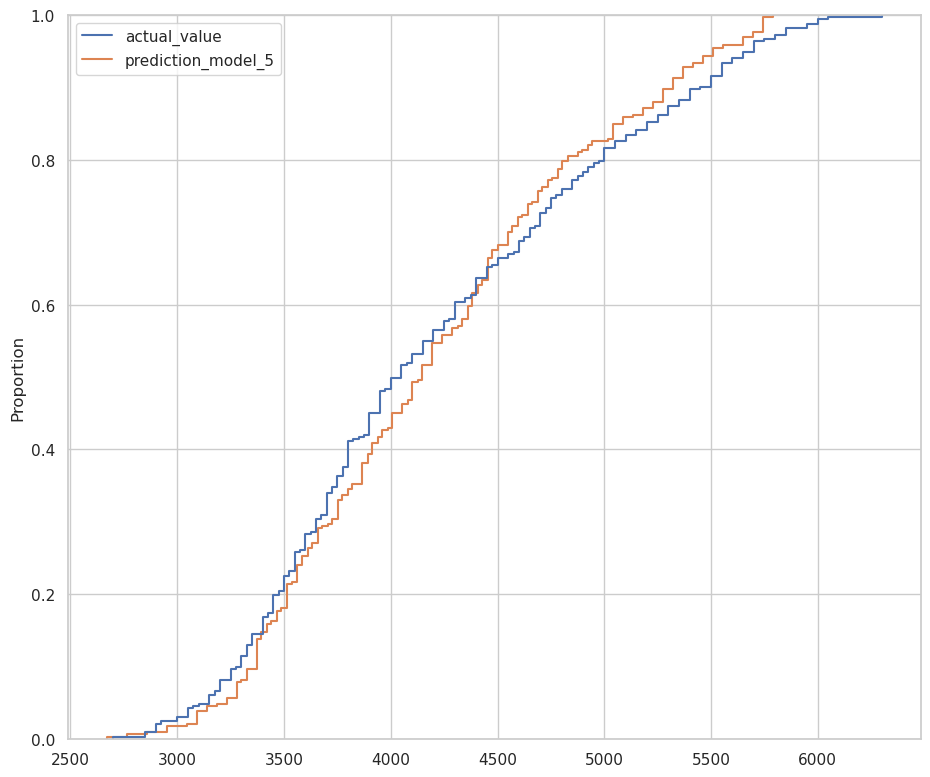

In [763]:
sns.ecdfplot(data=models_results.select_columns(['actual_value','prediction_model_5']))

<Axes: ylabel='Density'>

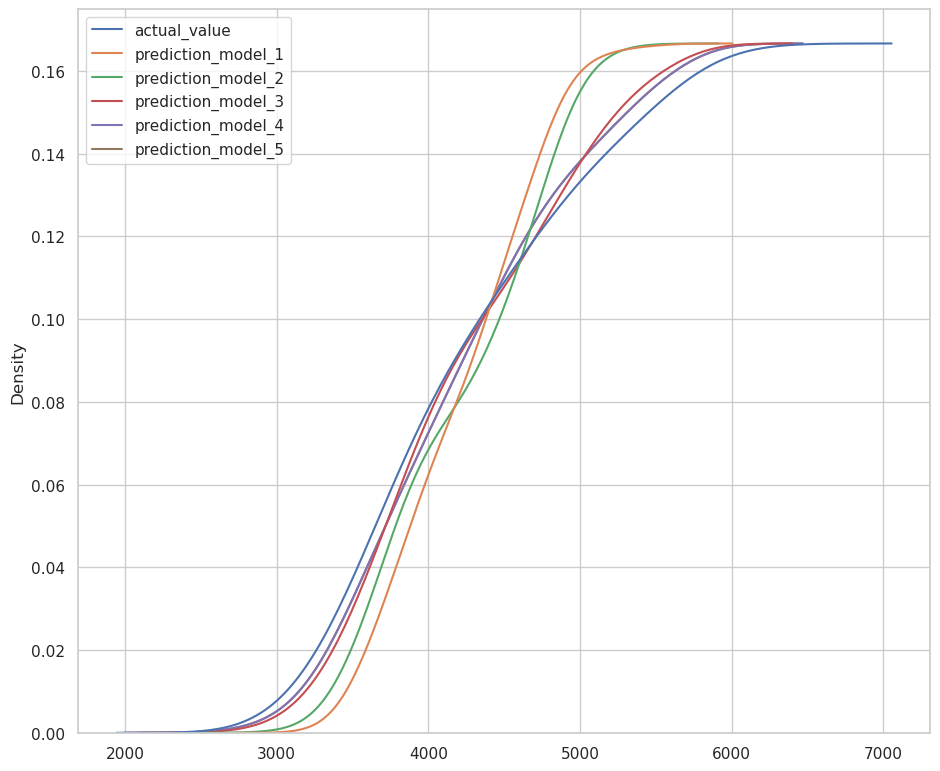

In [765]:
sns.kdeplot(data=models_results, cumulative=True)

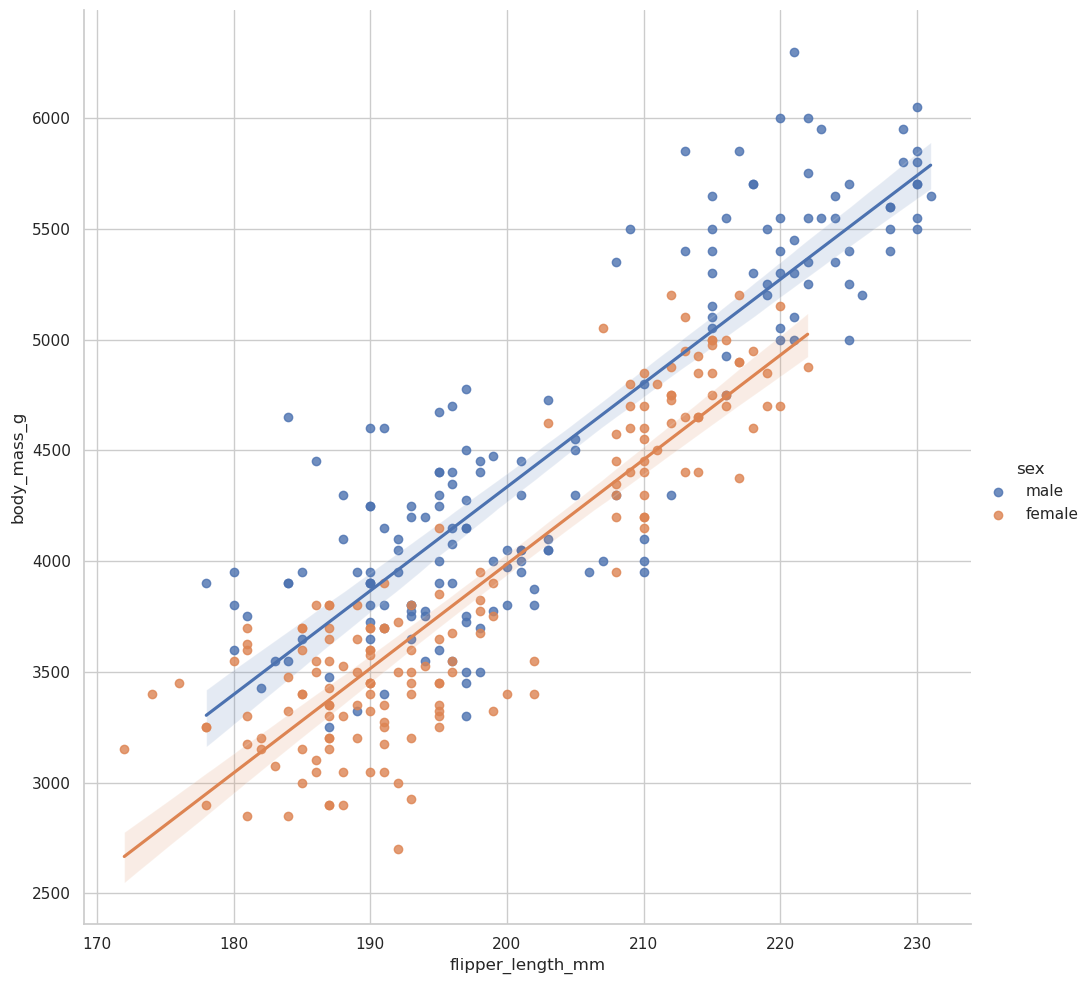

In [769]:
sns.lmplot(data=processed_penguins_df, x='flipper_length_mm', y='body_mass_g', hue='sex', height=10)

In [776]:
smf.logit(
  formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
  data=processed_penguins_df
).fit().summary()


Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Tue, 20 Feb 2024   Pseudo R-squ.:                  0.4793
Time:                        22:55:18   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [777]:
processed_penguins_df.value_counts(['island','sex']).reset_index(name='count')

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


In [780]:
processed_penguins_df = processed_penguins_df.assign(is_adelie = lambda df: df['species'].replace(['Adelie', 'Gentoo', 'Chinstrap'], [1, 0, 0]))

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1,1
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1,0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1,0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1,0


In [781]:
model_is_adelie = smf.logit(
  formula='is_adelie ~ flipper_length_mm + C(sex)',
  data=processed_penguins_df
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [782]:
is_adelie_df_predictions = pd.DataFrame(dict(actual_adelie=processed_penguins_df
                                             ['is_adelie'], 
                                             predicted_values = model_is_adelie.predict().round()))
is_adelie_df_predictions

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


In [784]:
is_adelie_df_predictions.value_counts(['actual_adelie', 'predicted_values']).reset_index(name='count')

,actual_adelie,predicted_values,count
0,0,0.0,151
1,1,1.0,129
2,0,1.0,36
3,1,0.0,17


In [785]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409

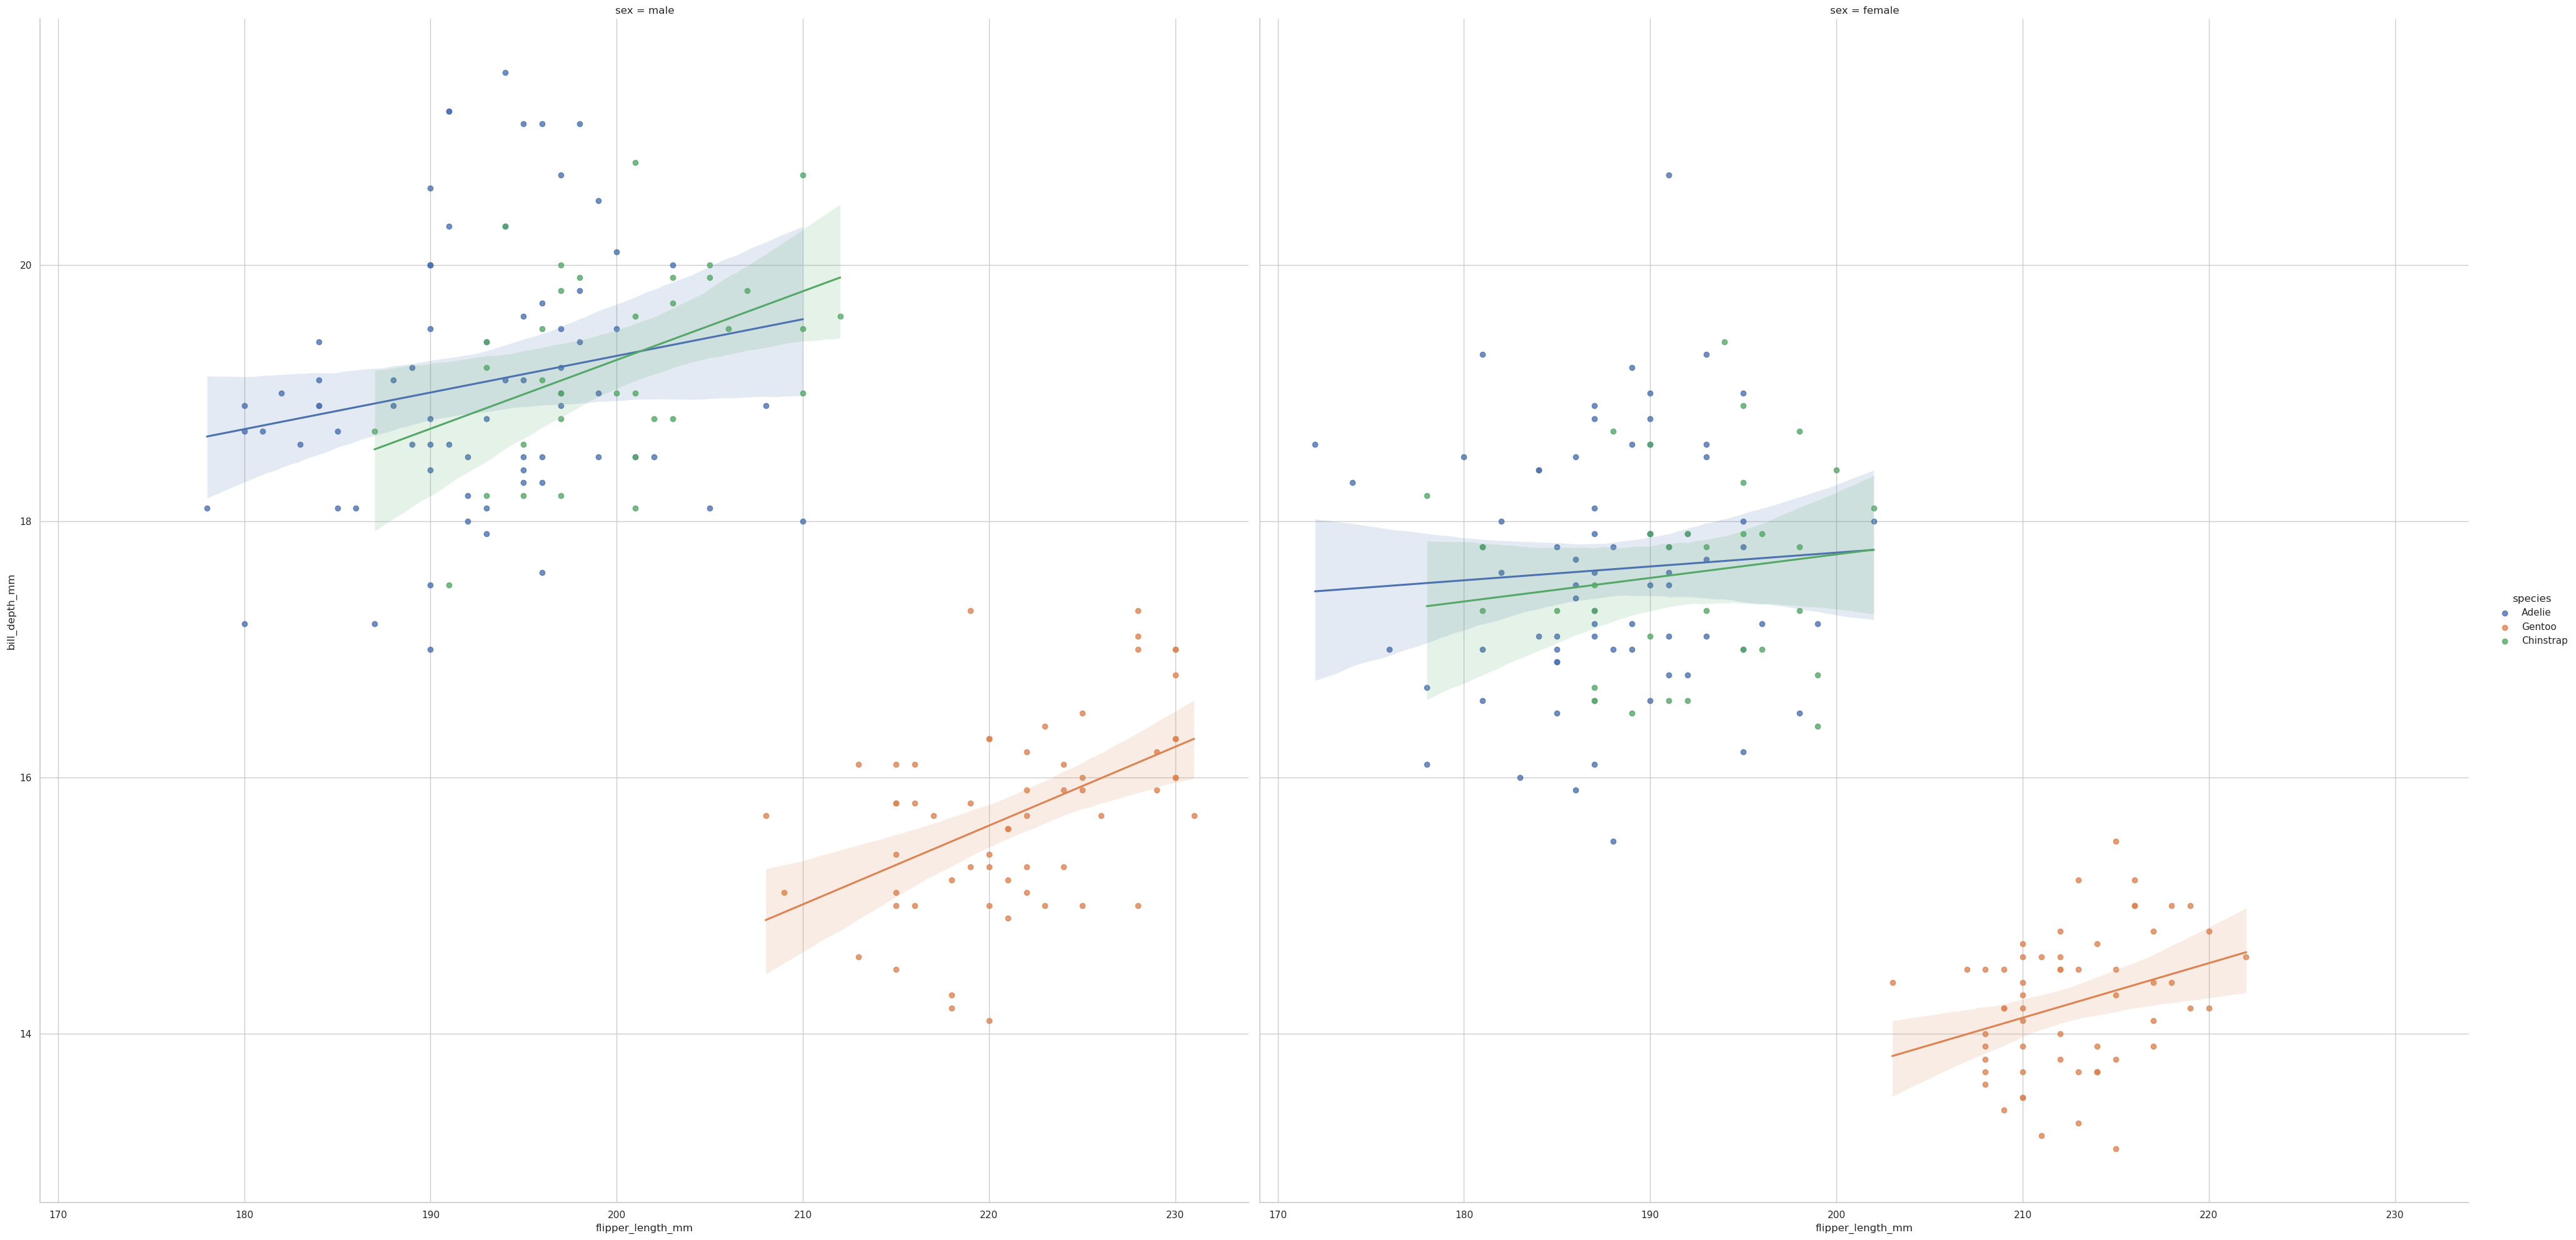

In [792]:
sns.lmplot(data=processed_penguins_df, x='flipper_length_mm', y='bill_depth_mm', hue='species', col='sex', height=5)